# (연구) graft – tutorial

신록예찬  
2023-11-09

# 1. Install

``` bash
conda create -n graft 
conda activate graft 
conda install pytorch torchvision torchaudio pytorch-cuda=12.1 -c pytorch -c nvidia
conda install pyg -c pyg 
conda install -c conda-forge notebook 
conda install -c conda-forge graph-tool
```

ref:
<https://git.skewed.de/count0/graph-tool/-/wikis/installation-instructions>

In [1]:
!pip uninstall graft -y
!pip install git+https://github.com/guebin/graft.git

Found existing installation: graft 0.0.1
Uninstalling graft-0.0.1:
  Successfully uninstalled graft-0.0.1
  Cloning https://github.com/guebin/graft.git to /tmp/pip-req-build-flf5umz2
  Running command git clone --filter=blob:none --quiet https://github.com/guebin/graft.git /tmp/pip-req-build-flf5umz2
  Resolved https://github.com/guebin/graft.git to commit fc4d7fd9800885fff458daa51624892cf207ee54
  Preparing metadata (setup.py) ... done
  Created wheel for graft: filename=graft-0.0.1-py3-none-any.whl size=8061 sha256=074b2479a3c10e63a7ec7581bccb38464fb39eeab07478338d8e462e953cd474
  Stored in directory: /tmp/pip-ephem-wheel-cache-tuoa4901/wheels/5a/da/81/7f1de9f08d7753f35b8a3ca78aaacecedc86bc4077124d73fe
Successfully built graft

# 2. Imports

In [2]:
import numpy as np
import torch
import torch_geometric
import graft
import warnings
warnings.filterwarnings("ignore")

# 3. Undirected / Unweighted

`# Ex` – default

In [3]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
g = torch_geometric.data.Data(
    edge_index = links
)

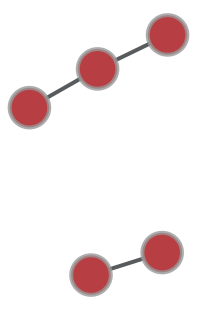

In [4]:
graft.graph.plot_undirected_unweighted(g)

`# Ex` – node_names

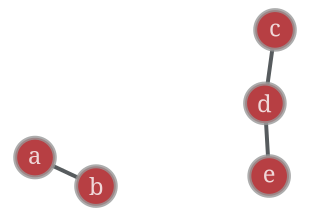

In [5]:
graft.graph.plot_undirected_unweighted(
    g, 
    node_names = ['a','b','c','d','e'], 
)

`# Ex` – node_color (continuous)

In [6]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
g = torch_geometric.data.Data(
    edge_index = links, 
    y = np.random.randn(5)
)

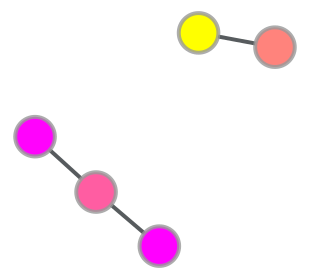

In [7]:
graft.graph.plot_undirected_unweighted(
    g,
    node_color=g.y
)

`# Ex` – node_color (discrete)

In [8]:
links = torch.tensor([[0, 2, 3, 4, 3],
                      [1, 3, 2, 3, 4]], dtype=torch.long)
g = torch_geometric.data.Data(
    edge_index = links, 
    y = torch.tensor([0,1,0,0,1])
)

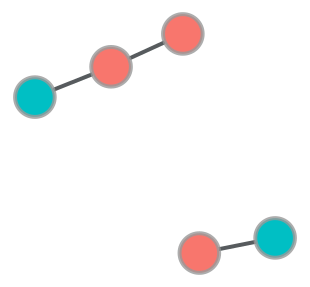

In [9]:
graft.graph.plot_undirected_unweighted(
    g,
    node_color=g.y
)

`# Ex` – node_color (discrete) / node_size

In [10]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
g = torch_geometric.data.Data(
    edge_index = links, 
    y = torch.tensor([0,1,0,0,1]),
    x = torch.tensor([10,100,15,20,150])
)

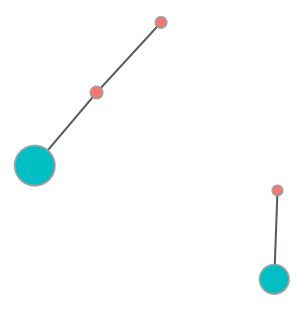

In [11]:
graft.graph.plot_undirected_unweighted(
    g,
    node_color=g.y,
    node_size=g.x
)

`# Ex` – draw options

In [12]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
g = torch_geometric.data.Data(
    edge_index = links
)

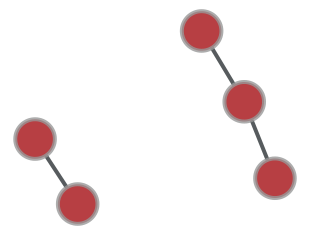

In [13]:
graft.graph.plot_undirected_unweighted(
    g,
)

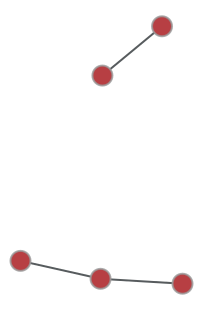

In [14]:
dr_opts = {
    'vertex_size':10
}
graft.graph.plot_undirected_unweighted(
    g,
    draw_options= dr_opts
)

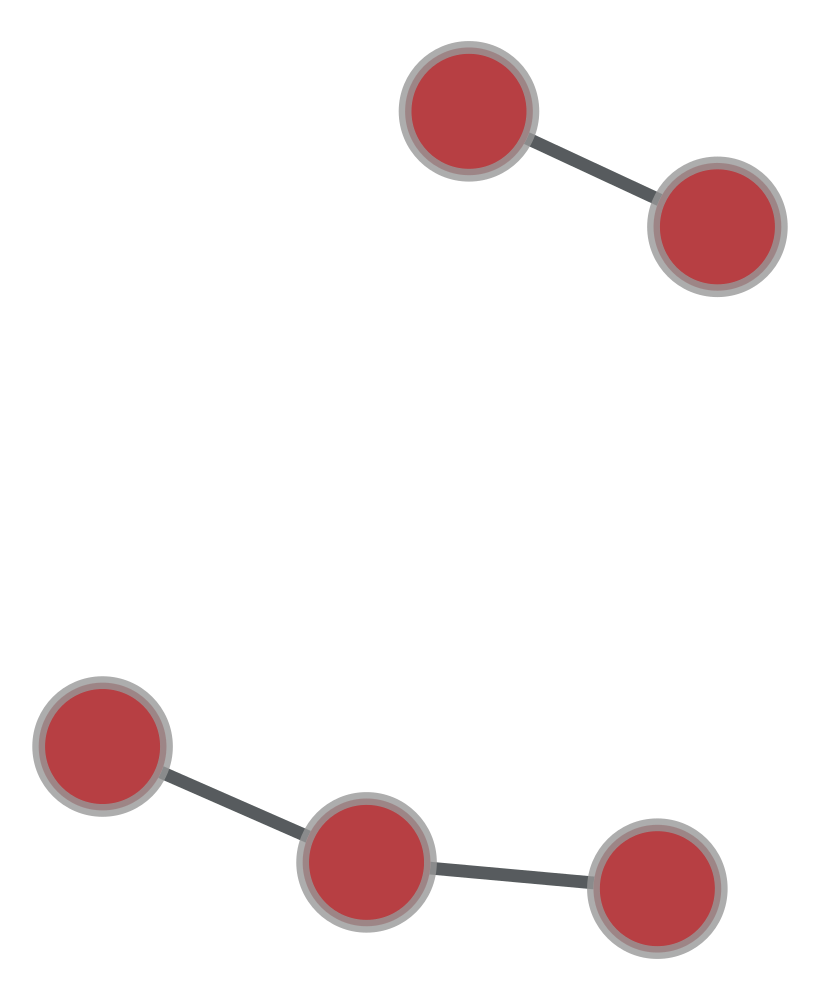

In [15]:
dr_opts = {
    'output_size': (500,500)
}
graft.graph.plot_undirected_unweighted(
    g,
    draw_options= dr_opts
)

# 4. Undirected / Weighted

`# Ex`

In [16]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)

g = torch_geometric.data.Data(
    edge_index=links,
    edge_attr=weights,
)

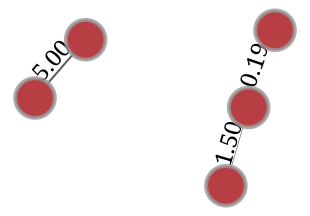

In [17]:
graft.graph.plot_undirected_weighted(
    g,
)

`# Ex`

In [18]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)

g = torch_geometric.data.Data(
    edge_index=links,
    edge_attr=weights,
)

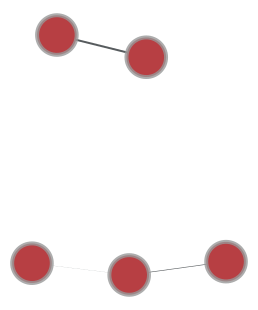

In [19]:
graft.graph.plot_undirected_weighted(
    g,
    edge_weight_text=False
)

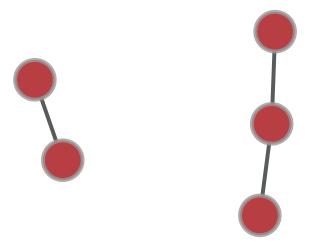

In [20]:
graft.graph.plot_undirected_weighted(
    g,
    edge_weight_text=False,
    edge_weight_width=False
)

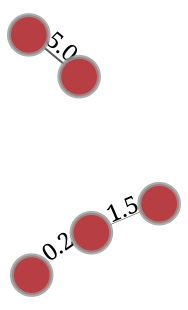

In [21]:
graft.graph.plot_undirected_weighted(
    g,
    edge_weight_text=True,
    edge_weight_width=True,
    edge_weight_text_format='.1f',
)

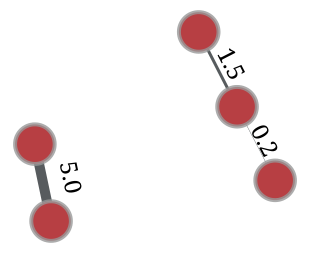

In [22]:
graft.graph.plot_undirected_weighted(
    g,
    edge_weight_text=True,
    edge_weight_width=True,
    edge_weight_text_format='.1f',
    edge_weight_width_scale=5.0,
)

`# Ex`

In [23]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)
g = torch_geometric.data.Data(
    edge_index=links,
    edge_attr=weights,
    y = torch.tensor([1,1,0,0,0])
)

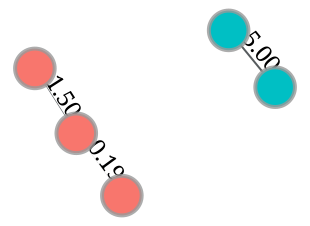

In [24]:
graft.graph.plot_undirected_weighted(
    g,
    node_color=g.y
)

`# Ex`

In [25]:
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)
g = torch_geometric.data.Data(
    edge_index = links, 
    edge_attr = weights,
    y = torch.tensor([0,1,0,0,1]),
    x = torch.tensor([1,3,1,2,4])
)

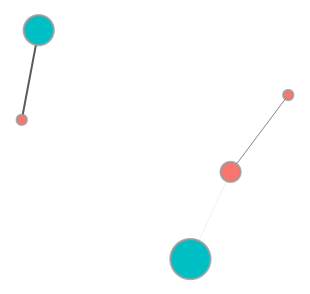

In [26]:
graft.graph.plot_undirected_weighted(
    g,
    node_color=g.y,
    node_size=g.x,
    edge_weight_text=False,
)

# 5. Directed / Unweighted

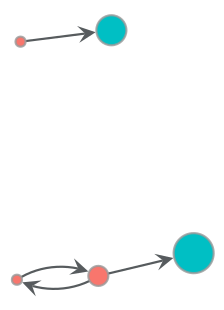

In [27]:
# Define the graph components
links = torch.tensor([[0, 2, 3, 3],
                      [1, 3, 2, 4]], dtype=torch.long)

# Create a PyTorch Geometric Data object
g = torch_geometric.data.Data(
    edge_index=links,
    y=torch.tensor([0, 1, 0, 0, 1]),
    x=torch.tensor([1, 3, 1, 2, 4])
)

# Example usage of the plot_directed_unweighted function
graft.graph.plot_directed_unweighted(
    g,
    node_color=g.y,
    node_size=g.x
)

# 6. Directed / Weighted

In [30]:
# Define the graph components
links = torch.tensor([[0, 1, 2, 3, 4, 3],
                      [1, 0, 3, 2, 3, 4]], dtype=torch.long)
weights = torch.tensor([5, 5, 1.5, 1.5, 0.19, 0.19], dtype=torch.float)

# Create a PyTorch Geometric Data object
g = torch_geometric.data.Data(
    edge_index=links,
    edge_attr=weights,
    y=torch.tensor([0, 1, 0, 0, 1]),
    x=torch.tensor([1, 3, 1, 2, 4])
)


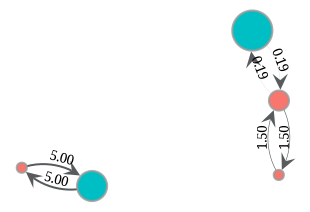

In [31]:

# Assuming the graph module with the new functions is imported as graft
# Example usage of the plot_directed_weighted function
graft.graph.plot_directed_weighted(
    g,
    node_color=g.y,
    node_size=g.x,
    edge_weight_text=True,
    edge_weight_width=True,
    edge_weight_width_scale=1,
    draw_options = {'edge_marker_size':8}
)

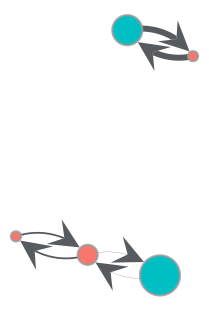

In [39]:

# Assuming the graph module with the new functions is imported as graft
# Example usage of the plot_directed_weighted function
graft.graph.plot_directed_weighted(
    g,
    node_color=g.y,
    node_size=g.x,
    edge_weight_text=False,
    edge_weight_width=True,
    edge_weight_width_scale=3,
    draw_options = {'edge_marker_size':15}
)